# Constructing the cumulative gains curve
- The cumulative gains curve is an evaluation curve that assesses the performance of your model. It shows the percentage of targets reached when considering a certain percentage of your population with the highest probability to be target according to your model. 
- To construct this curve, we can use the `.plot_cumulative_gain()` method in the `scikitplot` module and the `matplotlib.pyplot` module. As for each model evaluation metric or curve, we need the true target values on the one hand and the predictions on the other hand to construct the cumulative gains curve.

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Import the matplotlib.pyplot module 
import matplotlib.pyplot as plt

# Import the scikitplot module
import scikitplot as skplt

In [3]:
basetable = pd.read_csv('basetable_ex2_4.csv')

In [4]:
X = basetable[["age", "gender_F", "time_since_last_gift"]]
y = basetable[["target"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
pred = logreg.predict_proba(X_test)

c:\Python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


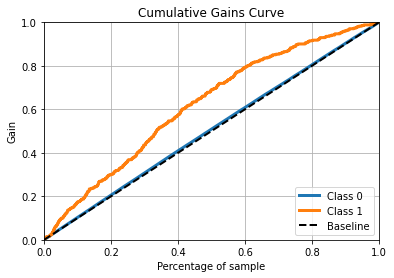

In [5]:
# Plot the cumulative gains graph
skplt.metrics.plot_cumulative_gain(y_test, pred)
plt.show()

## A random model
- We will reconstruct the cumulative gains curve's baseline, that is, the cumulative gains curve of a random model.
- To do so, we need to construct random predictions. The `plot_cumulative_gain` method requires two values for these predictions: one for the target to be 0 and one for the target to be 1. These values should sum to one, so a valid list of predictions could for instance be [(0.02,0.98),(0.27,0.73),...,(0.09,0.91)].

- In Python, we can generate a random value between values a and b as follows:

```python 
import random
random_value = random.uniform(a,b)
```

- Construct a list random_predictions that contains random numbers between 0 and 1.
- Adjust the list random_predictions such that it contains tuples (r,a) with r the original value of the list and a such that r+a=1
.
- The true values of the target are in targets_test. Show the cumulative gains graph of your random model.

In [6]:
import random
import matplotlib.pyplot as plt
import scikitplot as skplt

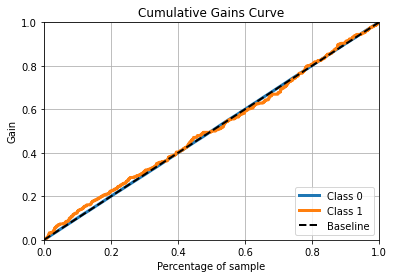

In [7]:
# Generate random predictions
random_predictions = [random.uniform(0,1) for _ in range(len(y_test))]

# Adjust random predictions
random_predictions = [(r, 1- r) for r in random_predictions]

# Plot the cumulative gains graph
skplt.metrics.plot_cumulative_gain(y_test, random_predictions)
plt.show()

####  We can observe that the cumulative gains curve of a random model aligns with the baseline.

### Constructing the lift curve
- The lift curve is an evaluation curve that assesses the performance of our model. It shows how many times more than average the model reaches targets.
- To construct this curve, we can use the `plot_lift_curve` method in the `scikitplot` module and the `matplotlib.pyplot` module. As for each model evaluation metric or curve, we need the true target values on the one hand and the predictions on the other hand to construct the cumulative gains curve.

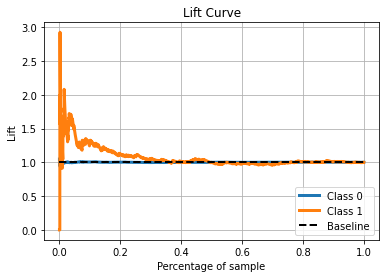

In [8]:
# Plot the lift curve
skplt.metrics.plot_lift_curve(y_test, random_predictions)
plt.show()

#### A perfect model
- reconstruct the lift curve of a perfect model. To do so, you need to construct perfect predictions. `plot_lift_curve` method requires two values for the predictions argument: the first argument for the target to be 0 and the second one for the target to be 1.

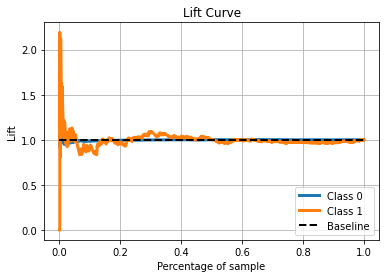

In [9]:
# Generate perfect predictions
perfect_predictions = [(1-target[0] , target[0]) for target in random_predictions]

# Plot the lift curve
skplt.metrics.plot_lift_curve(y_test, perfect_predictions)
plt.show()